___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [282]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from IPython.display import SVG
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [283]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


In [284]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [285]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [286]:
x_train.shape

(60000, 28, 28)

In [287]:
y_train.shape

(60000,)

In [288]:
x_test.shape

(10000, 28, 28)

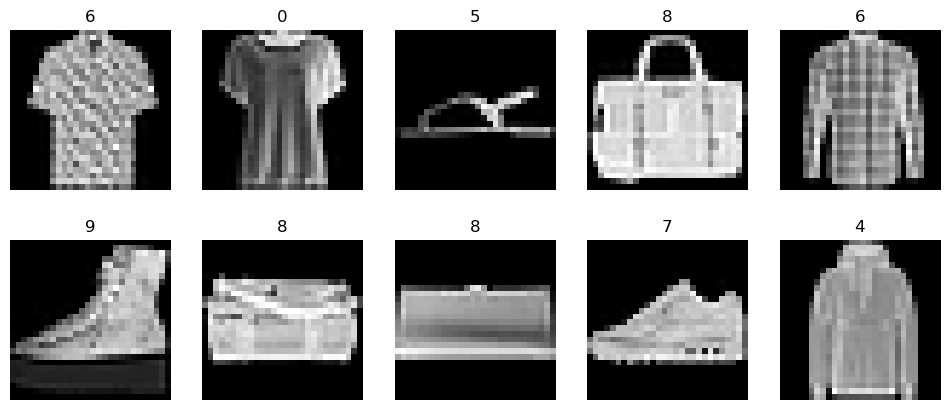

In [289]:
f, axes = plt.subplots(2, 5, figsize=(12, 5))

for ax in axes.ravel():
    idx = np.random.randint(0, len(x_train))
    ax.axis("off")
    ax.set_title(y_train[idx])
    ax.imshow(x_train[idx], cmap="gray")
plt.show()

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [290]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

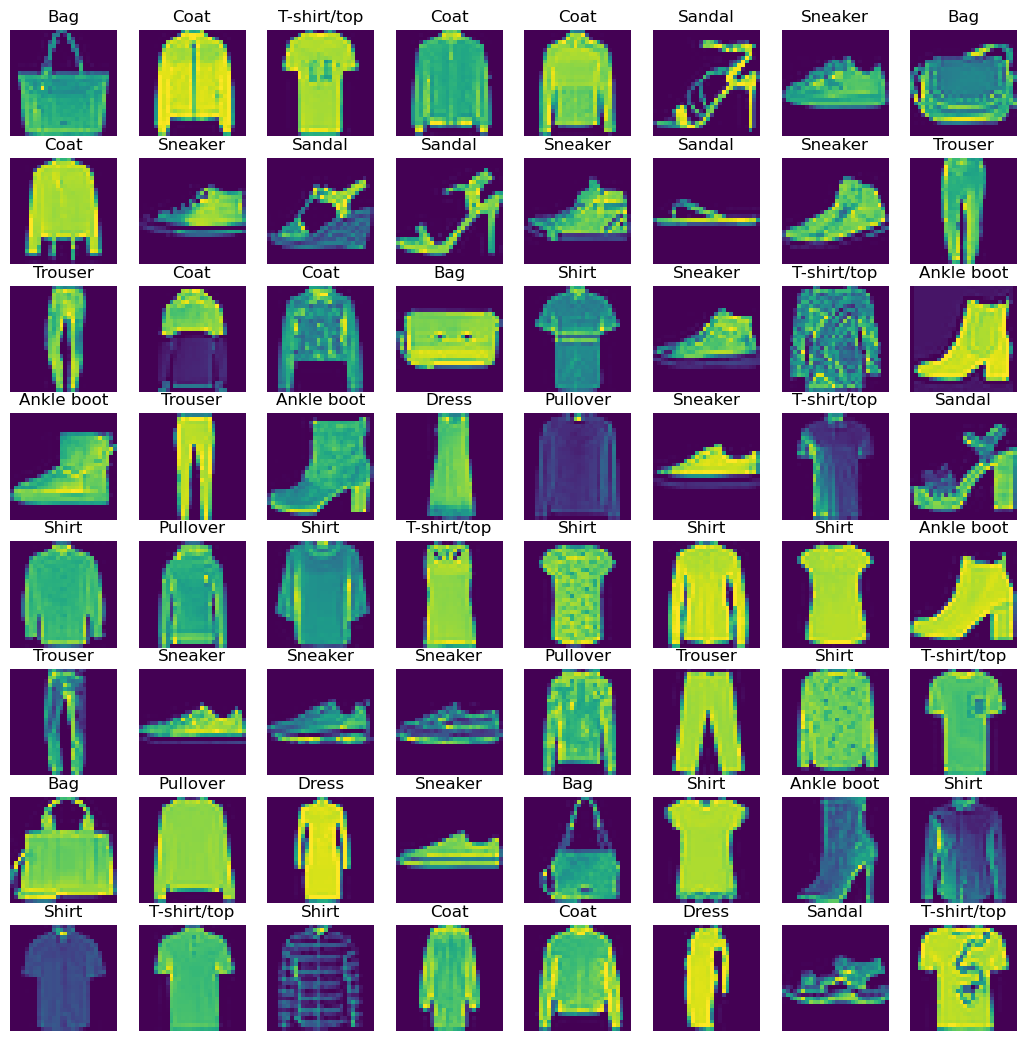

In [291]:
fig, axes = plt.subplots(8, 8)
fig.set_size_inches(13, 13)
for ax in axes.flatten():
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    ax.axis("off")
    ax.set_title(classes[int(y_train[rand_index])])
    ax.imshow(X_train[rand_index])
plt.show()

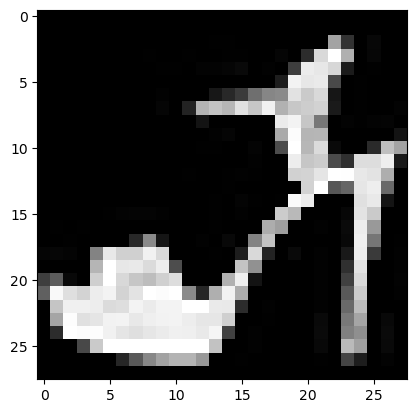

In [292]:
plt.imshow(x_train[9], cmap="gray")
plt.show()

In [293]:
y_train[9]

5

In [294]:
classes[y_train[9]]

'Sandal'

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [295]:
x_train.min()

0

In [296]:
x_train.max()

255

In [297]:
# Normalize image pixels
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

In [298]:
x_train.min()

0.0

In [299]:
x_train.max()

1.0

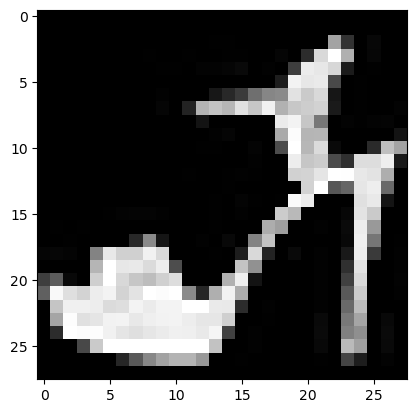

In [300]:
plt.imshow(x_train[9], cmap="gray")
plt.show()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [301]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [302]:
np.expand_dims(x_train, 3).shape

(60000, 28, 28, 1)

In [303]:
X_train = np.expand_dims(x_train, 3)
X_test = np.expand_dims(x_test, 3)

In [304]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [305]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [306]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [307]:
from tensorflow.keras.utils import to_categorical

In [308]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [309]:
y_train[9]

5

In [310]:
Y_train[9]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [311]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [312]:
model = Sequential()

model.add(
    Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu")
)  # stride = 1, padding = valid

model.add(MaxPool2D(pool_size=(2, 2), strides = (1,1)))  # stride = pool size, padding = valid

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [313]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 25, 25, 28)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 17500)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               2240128   
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1290      
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
_________________________________________________________________


##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [314]:
from tensorflow.keras.callbacks import EarlyStopping

In [315]:
early_stop = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=4, restore_best_weights=True
)

In [316]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/20
1875/1875 [==============================] - 68s 36ms/step - loss: 0.3644 - accuracy: 0.8722 - val_loss: 0.3210 - val_accuracy: 0.8815
Epoch 2/20
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2501 - accuracy: 0.9094 - val_loss: 0.2789 - val_accuracy: 0.9023
Epoch 3/20
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2139 - accuracy: 0.9234 - val_loss: 0.2793 - val_accuracy: 0.9074
Epoch 4/20
1875/1875 [==============================] - 68s 36ms/step - loss: 0.1913 - accuracy: 0.9327 - val_loss: 0.2723 - val_accuracy: 0.9115
Epoch 5/20
1875/1875 [==============================] - 68s 36ms/step - loss: 0.1736 - accuracy: 0.9388 - val_loss: 0.2829 - val_accuracy: 0.9093
Epoch 6/20
1875/1875 [==============================] - 68s 36ms/step - loss: 0.1581 - accuracy: 0.9446 - val_loss: 0.2912 - val_accuracy: 0.9065
Epoch 7/20
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1465 - accuracy: 0.9487 - val_loss: 0.3146 -

In [317]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.364446,0.872150,0.320951,0.8815
1,0.250098,0.909400,0.278943,0.9023
2,0.213892,0.923367,0.279327,0.9074
3,0.191285,0.932683,0.272349,0.9115
4,0.173562,0.938767,0.282905,0.9093


**TASK 7: Plot values of metrics you used in your model.**

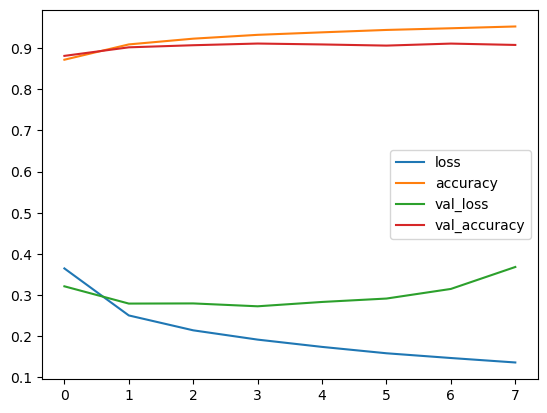

In [318]:
loss_df.plot();

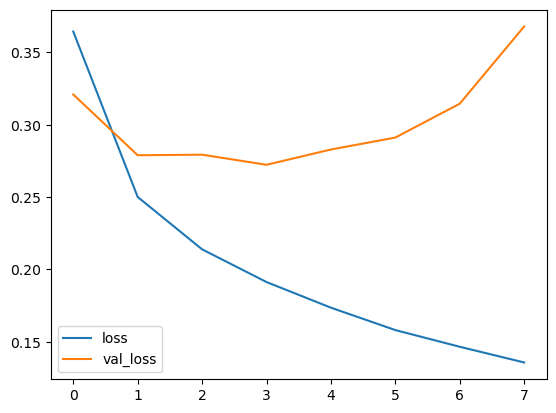

In [319]:
loss_df[["loss", "val_loss"]].plot();

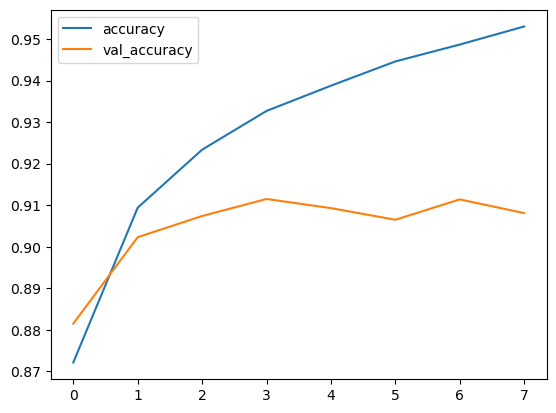

In [320]:
loss_df[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [321]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

In [322]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2723 - accuracy: 0.9115


[0.27234864234924316, 0.9114999771118164]

In [323]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.27234864234924316
Test accuracy: 0.9114999771118164


In [324]:
pred_prob = model.predict(X_test)
pred_prob

array([[2.33832349e-08, 1.43923686e-12, 3.30904243e-07, ...,
        3.19978775e-04, 1.09675156e-07, 9.99622941e-01],
       [9.89880505e-07, 5.58707101e-17, 9.99997258e-01, ...,
        1.70233971e-13, 5.37300137e-14, 7.83426872e-14],
       [2.91829005e-10, 1.00000000e+00, 4.27103082e-14, ...,
        2.79215724e-13, 1.02394137e-14, 8.57648758e-16],
       ...,
       [1.40245078e-07, 8.39508923e-15, 6.00866246e-09, ...,
        4.98299492e-11, 9.99999523e-01, 4.87078151e-13],
       [1.17713279e-08, 9.99999762e-01, 4.07038200e-13, ...,
        2.07278517e-11, 1.28607547e-13, 9.84246105e-13],
       [3.42052686e-03, 8.78470237e-05, 1.73145793e-02, ...,
        1.25859633e-01, 4.01655994e-02, 1.21545680e-02]], dtype=float32)

In [325]:
pred_prob.shape

(10000, 10)

In [326]:
pred_prob[0]

array([2.33832349e-08, 1.43923686e-12, 3.30904243e-07, 1.59790969e-09,
       2.26222374e-10, 5.65622358e-05, 5.76731765e-08, 3.19978775e-04,
       1.09675156e-07, 9.99622941e-01], dtype=float32)

In [327]:
np.argmax(pred_prob[0])

9

In [328]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [329]:
y_pred.shape

(10000,)

In [330]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.88      0.85      0.87      1000
           3       0.88      0.95      0.91      1000
           4       0.84      0.89      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.72      0.74      1000
           7       0.94      0.98      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [331]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [332]:
print(confusion_matrix(y_test, y_pred))

[[839   1  16  30   4   2 105   0   3   0]
 [  1 981   0  12   2   0   2   0   2   0]
 [ 17   0 850  10  66   1  55   0   1   0]
 [  8   4   8 951  11   0  18   0   0   0]
 [  2   1  38  34 890   1  33   0   1   0]
 [  0   0   0   1   0 977   0  14   0   8]
 [107   0  49  41  82   0 718   0   3   0]
 [  0   0   0   0   0   8   0 982   0  10]
 [  2   1   0   6   2   3   3   3 980   0]
 [  0   0   0   0   0   5   1  47   0 947]]


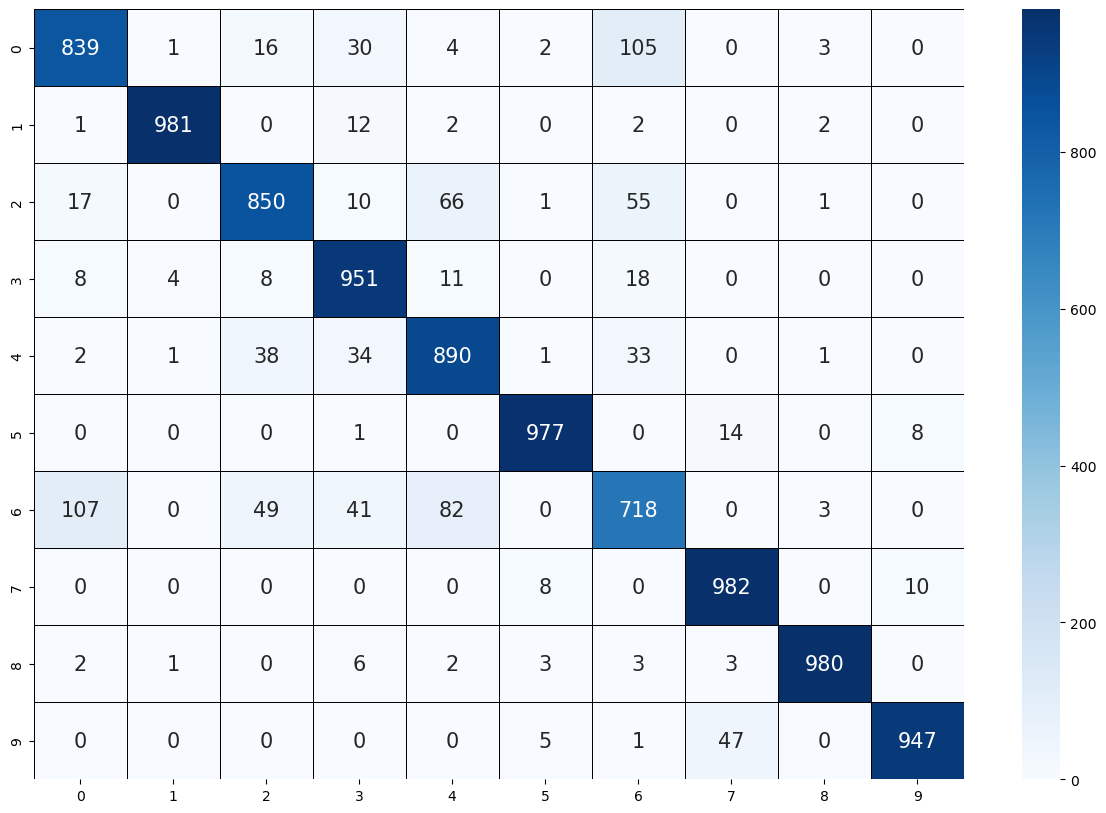

In [333]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [334]:
#classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [335]:
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [336]:
np.not_equal(y_test, y_pred).sum()

885

In [337]:
np.equal(y_test, y_pred).sum()

9115

## Prediction

In [338]:
my_number = X_test[3]

In [339]:
my_number.shape

(28, 28, 1)

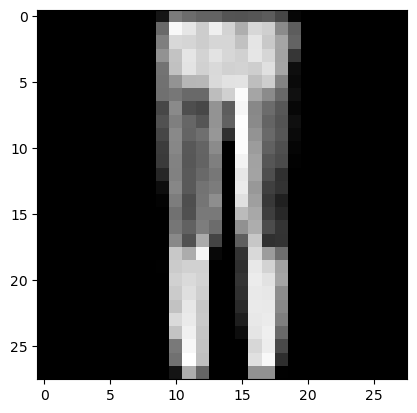

In [340]:
plt.imshow(my_number, cmap="gray")
plt.show()

In [341]:
np.expand_dims(my_number, 0).shape

(1, 28, 28, 1)

In [342]:
pred_prob = model.predict(np.expand_dims(my_number, 0))
pred_prob

array([[6.6496764e-09, 9.9999952e-01, 1.0497265e-12, 5.3070528e-07,
        7.3691457e-09, 1.6225212e-12, 1.3680196e-10, 2.9412597e-11,
        1.1154797e-12, 1.1825823e-13]], dtype=float32)

In [343]:
y_pred = np.argmax(pred_prob)
y_pred

1

# modeling 2

In [344]:
from tensorflow.keras.layers import BatchNormalization

In [345]:
model2 = Sequential()

model2.add(Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))

model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2), strides = (1,1)))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2), strides = (1,1)))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2), strides = (1,1)))
model2.add(Dropout(0.5))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [346]:
model2.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
    verbose = 1
)

Epoch 1/20
1875/1875 [==============================] - 626s 334ms/step - loss: 0.6219 - accuracy: 0.7923 - val_loss: 0.3618 - val_accuracy: 0.8746
Epoch 2/20
1875/1875 [==============================] - 627s 334ms/step - loss: 0.4071 - accuracy: 0.8650 - val_loss: 0.3461 - val_accuracy: 0.8756
Epoch 3/20
1875/1875 [==============================] - 629s 336ms/step - loss: 0.3588 - accuracy: 0.8817 - val_loss: 0.2841 - val_accuracy: 0.8995
Epoch 4/20
1875/1875 [==============================] - 632s 337ms/step - loss: 0.3397 - accuracy: 0.8904 - val_loss: 0.2949 - val_accuracy: 0.8986
Epoch 5/20
1875/1875 [==============================] - 632s 337ms/step - loss: 0.3216 - accuracy: 0.8955 - val_loss: 0.3272 - val_accuracy: 0.8827
Epoch 6/20
1875/1875 [==============================] - 633s 338ms/step - loss: 0.3108 - accuracy: 0.8993 - val_loss: 0.2672 - val_accuracy: 0.9074
Epoch 7/20
1875/1875 [==============================] - 625s 334ms/step - loss: 0.2996 - accuracy: 0.9024 - val_

In [347]:
loss1_df = pd.DataFrame(model2.history.history)
loss1_df.tail()

,loss,accuracy,val_loss,val_accuracy
8,0.283789,0.908183,0.235884,0.9151
9,0.279046,0.909583,0.266456,0.9067
10,0.273318,0.911767,0.266294,0.9069
11,0.266732,0.914350,0.275674,0.9026
12,0.263198,0.915450,0.295039,0.8962


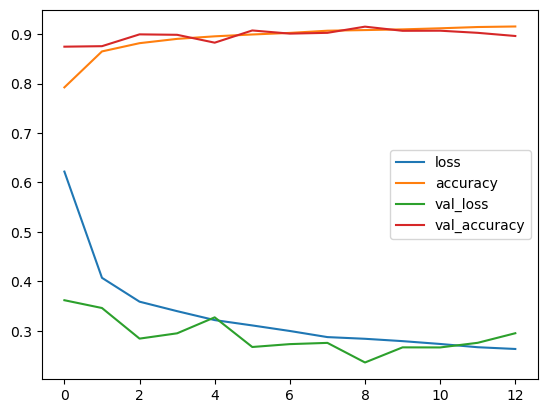

In [348]:
loss1_df.plot();

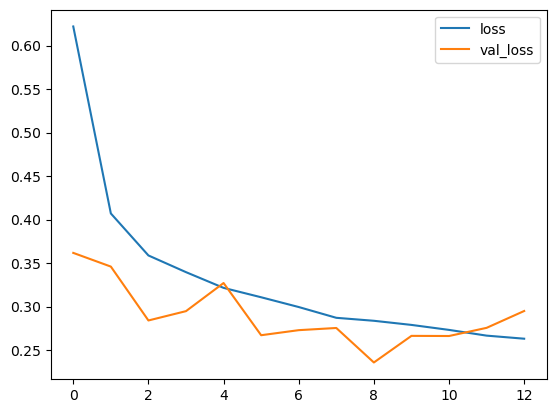

In [349]:
loss1_df[["loss", "val_loss"]].plot();

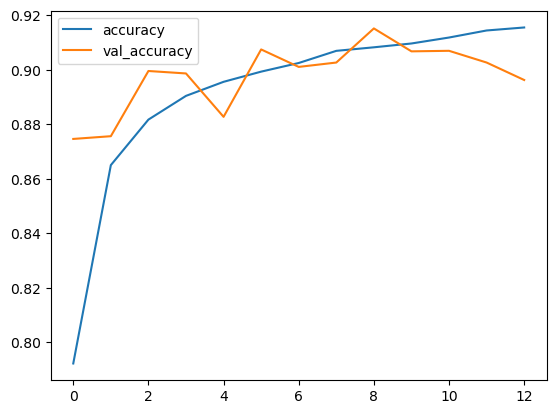

In [350]:
loss1_df[["accuracy", "val_accuracy"]].plot();

In [351]:
model2.evaluate(X_test, Y_test)

313/313 [==============================] - 10s 33ms/step - loss: 0.2359 - accuracy: 0.9151


[0.2358836680650711, 0.9150999784469604]

In [352]:
score = model2.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2358836680650711
Test accuracy: 0.9150999784469604


In [353]:
pred_prob_1 = model2.predict(X_test)
pred_prob_1

array([[4.4757957e-07, 1.1263159e-05, 6.7345348e-07, ..., 1.4814643e-04,
        2.9313835e-06, 9.9966526e-01],
       [4.1299784e-03, 9.1802714e-05, 9.6438086e-01, ..., 1.2341254e-04,
        5.5615888e-05, 6.1884864e-05],
       [2.5587374e-07, 9.9999666e-01, 1.1227088e-07, ..., 1.4885536e-07,
        8.3117942e-07, 3.2932920e-07],
       ...,
       [8.9308799e-07, 8.0459324e-07, 8.9141844e-07, ..., 9.9659140e-08,
        9.9999189e-01, 3.5694009e-07],
       [4.3357211e-08, 9.9999785e-01, 2.5840636e-08, ..., 6.1750562e-08,
        2.4316799e-07, 1.3245877e-07],
       [4.5770776e-04, 4.9056642e-04, 6.1214837e-04, ..., 6.0627844e-02,
        4.6208338e-03, 4.7095856e-03]], dtype=float32)

In [354]:
pred_prob_1.shape

(10000, 10)

In [355]:
pred_prob_1[0]

array([4.4757957e-07, 1.1263159e-05, 6.7345348e-07, 1.1781821e-06,
       4.1587120e-07, 1.6908142e-04, 5.5124468e-07, 1.4814643e-04,
       2.9313835e-06, 9.9966526e-01], dtype=float32)

In [356]:
np.argmax(pred_prob_1[0])

9

In [357]:
y_pred_1 = np.argmax(pred_prob_1, axis=1)
y_pred_1

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [358]:
y_pred_1.shape

(10000,)

In [359]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1000
           1       0.99      0.98      0.98      1000
           2       0.88      0.88      0.88      1000
           3       0.87      0.94      0.90      1000
           4       0.89      0.83      0.86      1000
           5       0.99      0.99      0.99      1000
           6       0.72      0.80      0.76      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [360]:
print(confusion_matrix(y_test, y_pred_1))

[[818   1  12  36   1   1 125   0   6   0]
 [  0 980   1  16   0   0   1   0   2   0]
 [  9   1 879  10  31   0  70   0   0   0]
 [  3   5   6 941  15   0  30   0   0   0]
 [  0   1  45  38 832   0  84   0   0   0]
 [  0   0   0   0   0 986   0  12   0   2]
 [ 59   0  49  36  48   0 801   0   7   0]
 [  0   0   0   0   0   7   0 973   0  20]
 [  1   2   4   5   3   2   3   3 977   0]
 [  0   0   0   0   0   5   0  31   0 964]]


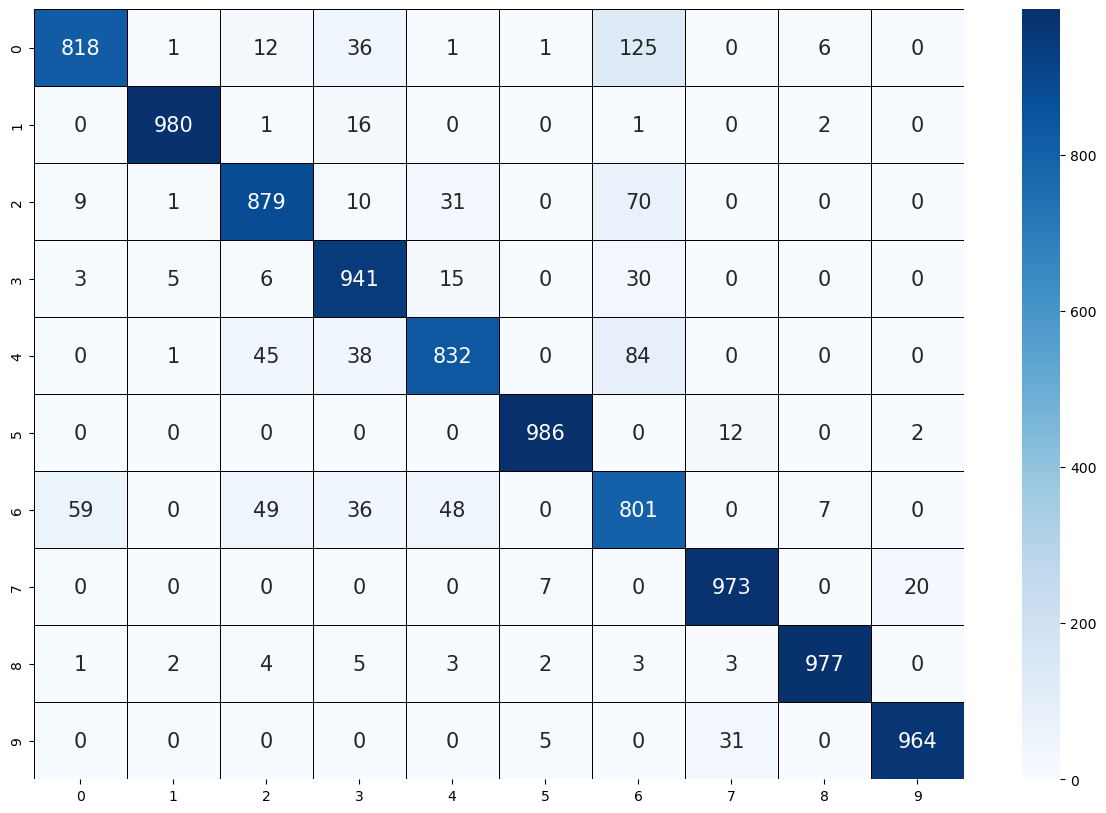

In [361]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred_1),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [362]:
np.not_equal(y_test, y_pred_1)

array([False, False, False, ..., False, False, False])

In [363]:
np.not_equal(y_test, y_pred_1).sum()

849

In [364]:
np.equal(y_test, y_pred_1).sum()

9151

# Prediction

In [365]:
my_number1 = X_test[5]

In [366]:
my_number1.shape

(28, 28, 1)

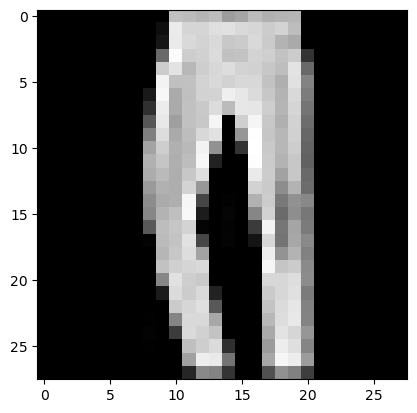

In [367]:
plt.imshow(my_number1, cmap="gray")
plt.show()

In [368]:
np.expand_dims(my_number1, 0).shape

(1, 28, 28, 1)

In [369]:
pred_prob1 = model2.predict(np.expand_dims(my_number1, 0))
pred_prob1

array([[2.9274390e-06, 9.9996758e-01, 1.5721872e-06, 1.8424851e-06,
        3.3274125e-06, 4.2580295e-06, 3.4127449e-06, 5.4314683e-07,
        1.0211950e-05, 4.2024180e-06]], dtype=float32)

In [370]:
y_pred1 = np.argmax(pred_prob1)
y_pred1

1

In [240]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# modeling 3

In [255]:
model3 = Sequential()

model3.add(Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))

model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2), strides = (1,1)))
model3.add(Dropout(0.5))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=28, kernel_size=(3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2), strides = (1,1)))
model3.add(Dropout(0.5))

model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(64, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [257]:
model3.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 28)        112       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 25, 25, 28)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 25, 25, 28)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 25, 25, 28)        112       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 23, 23, 28)        7084      
_________________________________________________________________
batch_normalization_9 (Batch (None, 23, 23, 28)      

In [258]:
model3.fit(
    X_train,
    Y_train,
    batch_size=24,
    epochs=50,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/50
2500/2500 [==============================] - 121s 48ms/step - loss: 0.5131 - accuracy: 0.8285 - val_loss: 0.3387 - val_accuracy: 0.8794
Epoch 2/50
2500/2500 [==============================] - 119s 48ms/step - loss: 0.4337 - accuracy: 0.8592 - val_loss: 0.4883 - val_accuracy: 0.8663
Epoch 3/50
2500/2500 [==============================] - 119s 48ms/step - loss: 0.3991 - accuracy: 0.8692 - val_loss: 0.3494 - val_accuracy: 0.8897
Epoch 4/50
2500/2500 [==============================] - 113s 45ms/step - loss: 0.3799 - accuracy: 0.8781 - val_loss: 0.2885 - val_accuracy: 0.8994
Epoch 5/50
2500/2500 [==============================] - 113s 45ms/step - loss: 0.3665 - accuracy: 0.8819 - val_loss: 0.3376 - val_accuracy: 0.8771
Epoch 6/50
2500/2500 [==============================] - 114s 45ms/step - loss: 0.3634 - accuracy: 0.8849 - val_loss: 0.2838 - val_accuracy: 0.9064
Epoch 7/50
2500/2500 [==============================] - 114s 45ms/step - loss: 0.3525 - accuracy: 0.8871 - val_loss: 0

In [261]:
loss_df2 = pd.DataFrame(model3.history.history)
loss_df2.tail()

,loss,accuracy,val_loss,val_accuracy
6,0.352532,0.887100,0.269332,0.9102
7,0.345486,0.890383,0.312604,0.8889
8,0.340182,0.891633,0.282190,0.9023
9,0.335044,0.895250,0.298900,0.8961
10,0.333135,0.894933,0.336981,0.8775


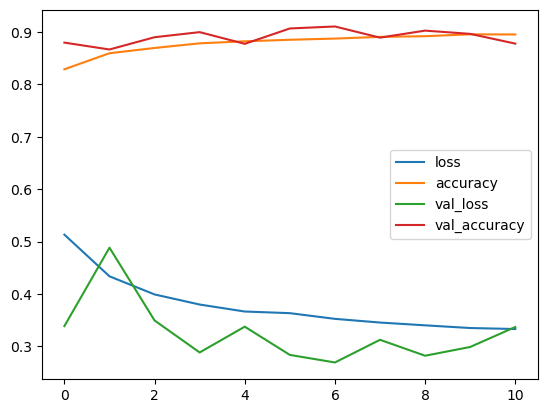

In [265]:
loss_df2.plot();

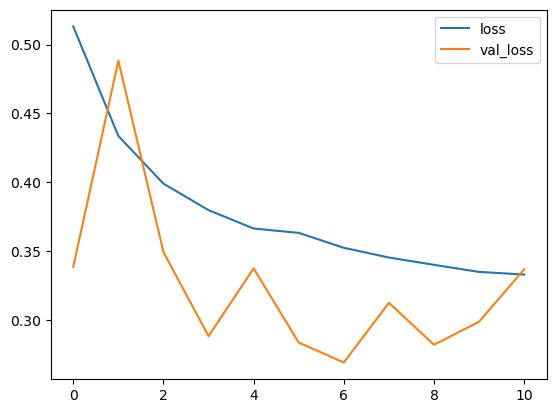

In [267]:
loss_df2[["loss", "val_loss"]].plot();

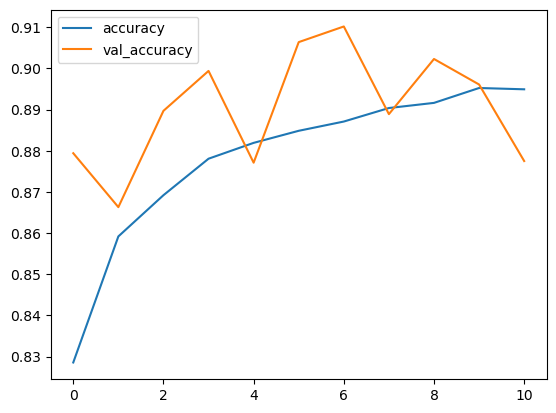

In [269]:
loss_df2[["accuracy", "val_accuracy"]].plot();

In [272]:
model3.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.2693 - accuracy: 0.9102


[0.2693319022655487, 0.9101999998092651]

In [273]:
pred_prob2 = model3.predict(X_test)
pred_prob2

array([[7.8265030e-06, 2.5487847e-05, 1.0876578e-05, ..., 1.5257027e-03,
        3.2613603e-05, 9.9746346e-01],
       [3.9144717e-03, 7.3494717e-05, 9.7404999e-01, ..., 9.7485186e-05,
        1.2183301e-04, 7.5611628e-05],
       [7.6615447e-07, 9.9999475e-01, 3.5853674e-07, ..., 2.8183581e-07,
        9.8685234e-07, 6.8167827e-07],
       ...,
       [1.1510603e-05, 1.2550190e-06, 4.7533158e-06, ..., 1.3957315e-06,
        9.9992752e-01, 3.8013002e-06],
       [4.7015257e-07, 9.9999523e-01, 3.1668910e-07, ..., 2.8736451e-07,
        4.0568975e-07, 4.6053520e-07],
       [3.6188704e-04, 2.0077130e-04, 4.0389056e-04, ..., 2.4970162e-01,
        3.5103357e-03, 6.0463590e-03]], dtype=float32)

In [274]:
pred_prob2.shape

(10000, 10)

In [275]:
pred_prob2[0]

array([7.8265030e-06, 2.5487847e-05, 1.0876578e-05, 1.2433849e-05,
       7.5928283e-06, 9.0274756e-04, 1.1283650e-05, 1.5257027e-03,
       3.2613603e-05, 9.9746346e-01], dtype=float32)

In [276]:
np.argmax(pred_prob2[0])

9

In [277]:
y_pred2 = np.argmax(pred_prob2, axis=1)
y_pred2

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [278]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1000
           1       0.99      0.98      0.98      1000
           2       0.90      0.82      0.86      1000
           3       0.90      0.94      0.92      1000
           4       0.86      0.88      0.87      1000
           5       0.99      0.98      0.98      1000
           6       0.73      0.72      0.73      1000
           7       0.94      0.98      0.96      1000
           8       0.94      0.98      0.96      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [279]:
print(confusion_matrix(y_test, y_pred2))

[[867   2  10  15   2   1  92   0  11   0]
 [  0 978   0  13   0   0   4   0   5   0]
 [ 16   0 823  11  62   0  82   0   6   0]
 [  7   4   7 936   8   0  34   0   3   1]
 [  0   1  25  39 878   0  53   0   4   0]
 [  0   0   0   0   0 978   0  18   0   4]
 [103   1  49  27  69   1 722   0  28   0]
 [  0   0   0   0   0   3   0 980   0  17]
 [  1   1   0   4   1   4   1   3 985   0]
 [  0   0   0   0   0   4   0  40   1 955]]


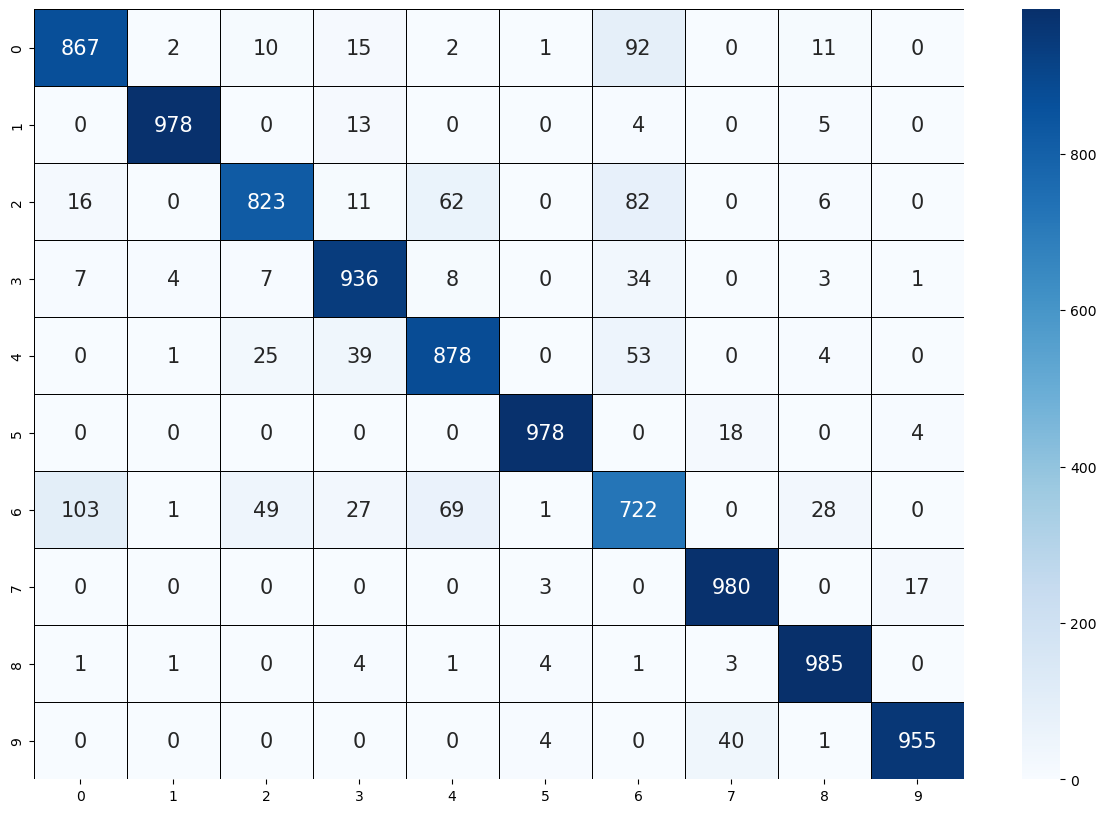

In [281]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred2),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___